# Part 1: Scraping Data Review Tokopedia dari PlayStore

Notebook ini berisi kode untuk melakukan scraping data review aplikasi Tokopedia dari Google PlayStore.

## Import Library yang Diperlukan

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import Sort, reviews_all
import warnings
warnings.filterwarnings('ignore')

## Fungsi untuk Scraping Review

In [12]:
def scrape_playstore_reviews(app_id, count=20000):
    print(f"Mengambil review untuk aplikasi dengan ID: {app_id}")

    # Scraping menggunakan reviews_all() tanpa unpacking
    result = reviews_all(
        app_id,
        lang='id',  # Bahasa Indonesia
        country='id',  # Indonesia
        sort=Sort.NEWEST,  # Sortir berdasarkan yang terbaru
    )
        # Membuat DataFrame dari hasil scraping
    df = pd.DataFrame(result)

    # Mengambil kolom yang diperlukan
    df = df[['content', 'score', 'at']]

    # Membatasi jumlah data jika lebih dari count
    if len(df) > count:
        df = df.iloc[:count]

    print(f"Berhasil mengambil {len(df)} review")
    return df

## Mengambil Data Review Tokopedia

In [13]:
# ID aplikasi Tokopedia di PlayStore
app_id = 'com.tokopedia.tkpd'

# Jalankan fungsi untuk mendapatkan review
df_reviews = scrape_playstore_reviews(app_id)

Mengambil review untuk aplikasi dengan ID: com.tokopedia.tkpd
Berhasil mengambil 20000 review


## Melihat Data yang Telah Diambil

In [14]:
# Melihat 5 data pertama
df_reviews.head()

,content,score,at
0,apk tidak bisa beri ulasan barang yg sdh diter...,1,2025-03-19 21:22:48
1,bagus banget ini,5,2025-03-19 21:11:09
2,mantap,5,2025-03-19 21:10:00
3,aku nyaman banget di tokped keren ongkir grati...,5,2025-03-19 21:04:54
4,kurang gratis ongkir aja,5,2025-03-19 20:59:59


In [15]:
# Informasi umum tentang dataset
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   content  20000 non-null  object        
 1   score    20000 non-null  int64         
 2   at       20000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 468.9+ KB


In [16]:
# Statistik deskriptif
df_reviews.describe()

,score,at
count,20000.000000,20000
mean,3.398150,2025-01-07 05:07:52.516850176
min,1.000000,2024-11-04 09:23:34
25%,1.000000,2024-12-03 21:00:23
50%,5.000000,2025-01-03 05:37:26.500000
75%,5.000000,2025-02-12 11:50:13.249999872
max,5.000000,2025-03-19 21:22:48
std,1.807675,NaN


## Visualisasi Distribusi Rating

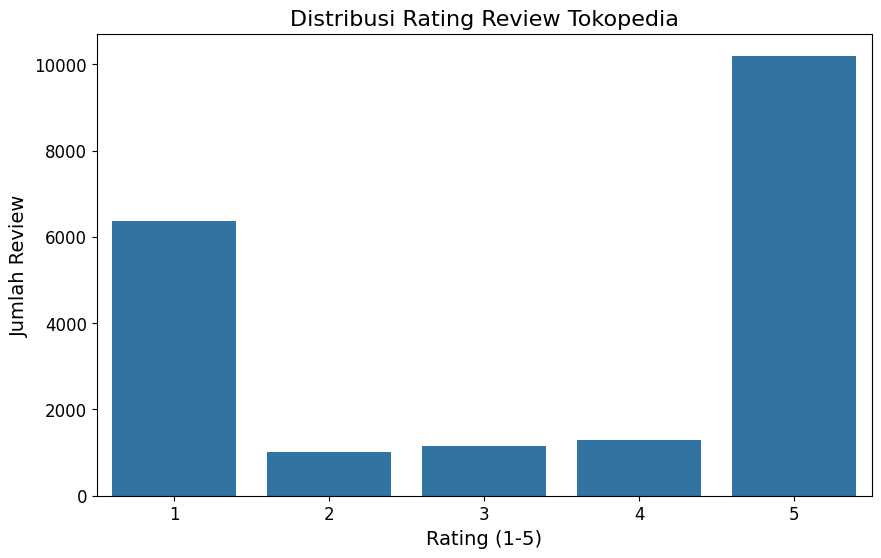

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='score', data=df_reviews)
plt.title('Distribusi Rating Review Tokopedia', fontsize=16)
plt.xlabel('Rating (1-5)', fontsize=14)
plt.ylabel('Jumlah Review', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

## Simpan Data ke CSV

In [18]:
# Simpan data ke file CSV
df_reviews.to_csv('tokopedia_reviews_raw.csv', index=False)
print("Data berhasil disimpan ke 'tokopedia_reviews_raw.csv'")

Data berhasil disimpan ke 'tokopedia_reviews_raw.csv'
